In [67]:
import numpy as np 
import tensorflow as tf
from scipy import stats
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [68]:
data=np.load("eeg_22_channel_data.npz")

input=data["input"].astype(np.float64)
targets=data["targets"].astype(np.int32)

for i in range(targets.shape[0]):
    targets[i]=targets[i]-7

np.unique(targets)

array([0, 1, 2, 3])

In [69]:
# feature extraction from eeg data
def mean(x):
    return(np.mean(x,axis=-1))

def std(x):
    return(np.std(x,axis=-1))

def ptp(x):
    return(np.ptp(x,axis=-1))

def vari(x):
    return(np.var(x,axis=-1))

def minim(x):
    return(np.min(x,axis=-1))

def maxi(x):
    return(np.max(x,axis=-1))

def argmaxim(x):  ##pos of max
    return(np.argmax(x,axis=-1))

def argmini(x):
    return(np.argmin(x,axis=-1))

def rms(x):
    return(np.sqrt(np.mean(x**2,axis=-1)))

def mean(x):
    return(np.mean(x,axis=-1))

def abs_diff_signal(x):
    return(np.sum(np.abs(np.diff(x,axis=-1)),axis=-1))

def kurtosis(x):
    return(stats.kurtosis(x,axis=-1))

def skewness(x):
    return(stats.skew(x,axis=-1))


def concatenate_features(x):
    return(np.concatenate((mean(x),std(x),ptp(x),vari(x),minim(x),maxi(x),argmaxim(x) ,
                           argmini(x),rms(x), mean(x),abs_diff_signal(x),kurtosis(x),skewness(x)),axis=1))
    
input_features=concatenate_features(input)

In [70]:
shuffled=np.arange(input_features.shape[0])
np.random.shuffle(shuffled)

targets=targets[shuffled]
input_features=input_features[shuffled]


In [71]:
input_featuresss=input_features[:int(input_features.shape[0]*0.8)]
input_targetsss=targets[:int(targets.shape[0]*0.8)]

print(input_featuresss.shape)
print(input_targetsss.shape)


validation_input=input_features[int(input_features.shape[0]*0.8):int(input_features.shape[0]*0.9)]
validation_targets=targets[int(input_features.shape[0]*0.8):int(input_features.shape[0]*0.9)]

print(validation_input.shape)
print(validation_targets.shape)

test_feature=input_features[int(input_features.shape[0]*0.9):]
test_targets=targets[int(input_features.shape[0]*0.9):int(input_features.shape[0])]

test_targets.shape , test_feature.shape

(1958, 286)
(1958,)
(245, 286)
(245,)


((245,), (245, 286))

In [72]:
inputs = tf.keras.Input(shape=(input_featuresss.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

lstm = tf.keras.layers.LSTM(256, return_sequences=True)(expand_dims)

flatten = tf.keras.layers.Flatten()(lstm)

fc1=tf.keras.layers.Dense(50,activation="relu")(flatten)

outputs = tf.keras.layers.Dense(4, activation='softmax')(fc1)

model = tf.keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 286)]             0         
                                                                 
 tf.expand_dims_3 (TFOpLambd  (None, 286, 1)           0         
 a)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 286, 256)          264192    
                                                                 
 flatten_3 (Flatten)         (None, 73216)             0         
                                                                 
 dense_3 (Dense)             (None, 50)                3660850   
                                                                 
 dense_4 (Dense)             (None, 4)                 204       
                                                           

In [73]:
model.compile(
    optimizer="adam",
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    input_featuresss,
    input_targetsss,
    validation_data=(validation_input,validation_targets),
    batch_size=32,
    epochs=22,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ],
    verbose=2
)

Epoch 1/22
62/62 - 6s - loss: 1.6336 - accuracy: 0.2620 - val_loss: 1.3865 - val_accuracy: 0.2367 - 6s/epoch - 104ms/step
Epoch 2/22
62/62 - 4s - loss: 1.3840 - accuracy: 0.2952 - val_loss: 1.3757 - val_accuracy: 0.2980 - 4s/epoch - 70ms/step
Epoch 3/22
62/62 - 4s - loss: 1.3757 - accuracy: 0.3115 - val_loss: 1.3687 - val_accuracy: 0.2898 - 4s/epoch - 68ms/step
Epoch 4/22
62/62 - 4s - loss: 1.3469 - accuracy: 0.3386 - val_loss: 1.3937 - val_accuracy: 0.2939 - 4s/epoch - 60ms/step
Epoch 5/22
62/62 - 4s - loss: 1.3267 - accuracy: 0.3621 - val_loss: 1.4091 - val_accuracy: 0.2571 - 4s/epoch - 61ms/step
Epoch 6/22
62/62 - 4s - loss: 1.3148 - accuracy: 0.3866 - val_loss: 1.3895 - val_accuracy: 0.2776 - 4s/epoch - 68ms/step
Epoch 7/22
62/62 - 4s - loss: 1.3032 - accuracy: 0.3856 - val_loss: 1.3866 - val_accuracy: 0.2939 - 4s/epoch - 64ms/step
Epoch 8/22
62/62 - 4s - loss: 1.2875 - accuracy: 0.4116 - val_loss: 1.3929 - val_accuracy: 0.2449 - 4s/epoch - 63ms/step


In [74]:
model.evaluate(test_feature,test_targets)
predicted=model.predict(test_feature)

8/8 [==============================] - 1s 24ms/step


8/8 [==============================] - 0s 20ms/step


c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\mshar\.conda\envs\gpupy310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


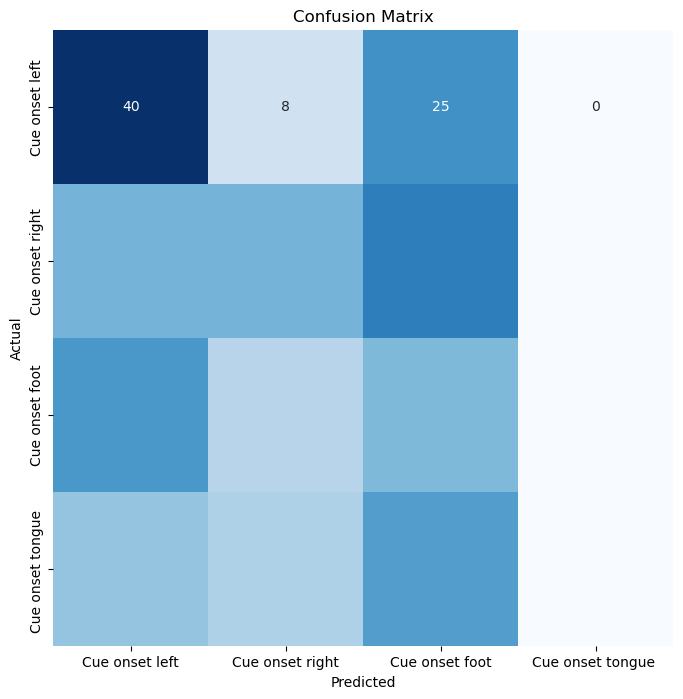

Classification Report:
----------------------
                    precision    recall  f1-score   support

   Cue onset left       0.40      0.55      0.47        73
  Cue onset right       0.37      0.29      0.32        66
   Cue onset foot       0.19      0.33      0.24        54
Cue onset tongue        0.00      0.00      0.00        52

         accuracy                           0.31       245
        macro avg       0.24      0.29      0.26       245
     weighted avg       0.26      0.31      0.28       245



In [75]:
label_mapping = {'Cue onset left': 0, 'Cue onset right': 1, 'Cue onset foot': 2,"Cue onset tongue ":3}
# 769     0x0301  Cue onset left (class 1)      7
# 770     0x0302  Cue onset right (class 2)     8
# 771     0x0303  Cue onset foot (class 3)      9
# 772     0x0304  Cue onset tongue (class 4)    10

y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(test_feature))))

cm = confusion_matrix(test_targets, y_pred)
clr = classification_report(test_targets, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, label_mapping.keys())
plt.yticks(np.arange(4) + 0.5, label_mapping.keys())


plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [76]:
# ### confusion matrix
# def confusion_matrixs(data,actual_value,model):
#     pre_values=model.predict(data)
#     binss=np.array([0,0.25,0.5,1])
#     cm=np.histogram(actual_value,pre_values,bins=binss)[0]
#     accuracy=(cm[0,0]+cm[2,2])/cm.sum()
#     return(cm,accuracy)


In [77]:
# confusion_matrixs(test_feature,test_targets,model=model)

In [78]:
# model.predict(test_feature)

In [79]:
# test_targets

In [80]:
small_input=test_feature[:15]
small_targets=test_targets[:15]

table=model.predict(small_input)
# retuen probablity
max(table[0])


1/1 [==============================] - 0s 43ms/step


0.30742985

In [81]:
predicted_targets=[]

predicted_targets_probablity=model.predict(test_feature)
for i in range(predicted_targets_probablity.shape[0]):
    p_max=max(predicted_targets_probablity[i])
    for j in range(predicted_targets_probablity[i].shape[0]):
        if p_max==predicted_targets_probablity[i][j]:
            predicted_targets.append(j)

8/8 [==============================] - 0s 20ms/step


In [82]:
# 769     0x0301  Cue onset left (class 1)      7
# 770     0x0302  Cue onset right (class 2)     8
# 771     0x0303  Cue onset foot (class 3)      9
# 772     0x0304  Cue onset tongue (class 4)    10


#define confusion_matrix
predicted_0_cue__onset_left=predicted_targets.count(0)
predicted_1_cue__onset_right=predicted_targets.count(1)
predicted_2_cue__onset_left=predicted_targets.count(2)
predicted_3_cue__onset_left=predicted_targets.count(3)

In [83]:
list_targets = []
for item in test_targets:
    list_targets.append(item)

In [84]:
actual_0_cue__onset_left=list_targets.count(0)
actual_1_cue__onset_right=list_targets.count(1)
actual_2_cue__onset_left=list_targets.count(2)
actual_3_cue__onset_left=list_targets.count(3)

In [85]:
actual_0_cue__onset_left,predicted_0_cue__onset_left

(73, 99)

In [86]:
actual_1_cue__onset_right,predicted_1_cue__onset_right

(66, 52)

In [87]:
actual_2_cue__onset_left,predicted_2_cue__onset_left

(54, 94)

In [88]:
actual_3_cue__onset_left,predicted_3_cue__onset_left

(52, 0)